# Comparision between HX and no HX
- Experimental parameter: 0 tilt, 120 s dwell, TEM mode, condensor lens (?50 micron?)
    - With and without HX.
- Notebook is made to compare the fitting using different order of the background polynomial to find out what is optimal.
    - The statistical error obtained using 'red_chisq' is not absolute as the variance is not provide in the metadata.
        It is however showing the trends?
        
- It seems that 8' order background polynomial provides a good fit. 

In [7]:
%matplotlib qt4
import hyperspy.api as hs
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import AutoMinorLocator
from __future__ import print_function
import sys
from cycler import cycler


nohx = hs.load('Spectrum 1.dm3')
nohx.metadata.General.title = "No Hard Xray"
nohx.change_dtype('float32')
hx = hs.load('Spectrum 2.dm3')
hx.metadata.General.title = "Hard Xray"
hx.change_dtype('float32')

spectra = [nohx,hx]

In [3]:
from prettytable import PrettyTable
t = PrettyTable(['Id', 'Total Counts','CPS'])
t.add_row(['NoHX', nohx.sum(0).data[0],(nohx.sum(0).data[0]/120.0)])
t.add_row(['HX', hx.sum(0).data[0],(hx.sum(0).data[0]/120.0)])
print (t)


+------+--------------+---------------+
|  Id  | Total Counts |      CPS      |
+------+--------------+---------------+
| NoHX | 2.37815e+06  | 19817.9333333 |
|  HX  | 2.32542e+06  | 19378.4583333 |
+------+--------------+---------------+


As seen in the table above, there is little difference in intensity between the spectra.

# Plot of the raw spectra

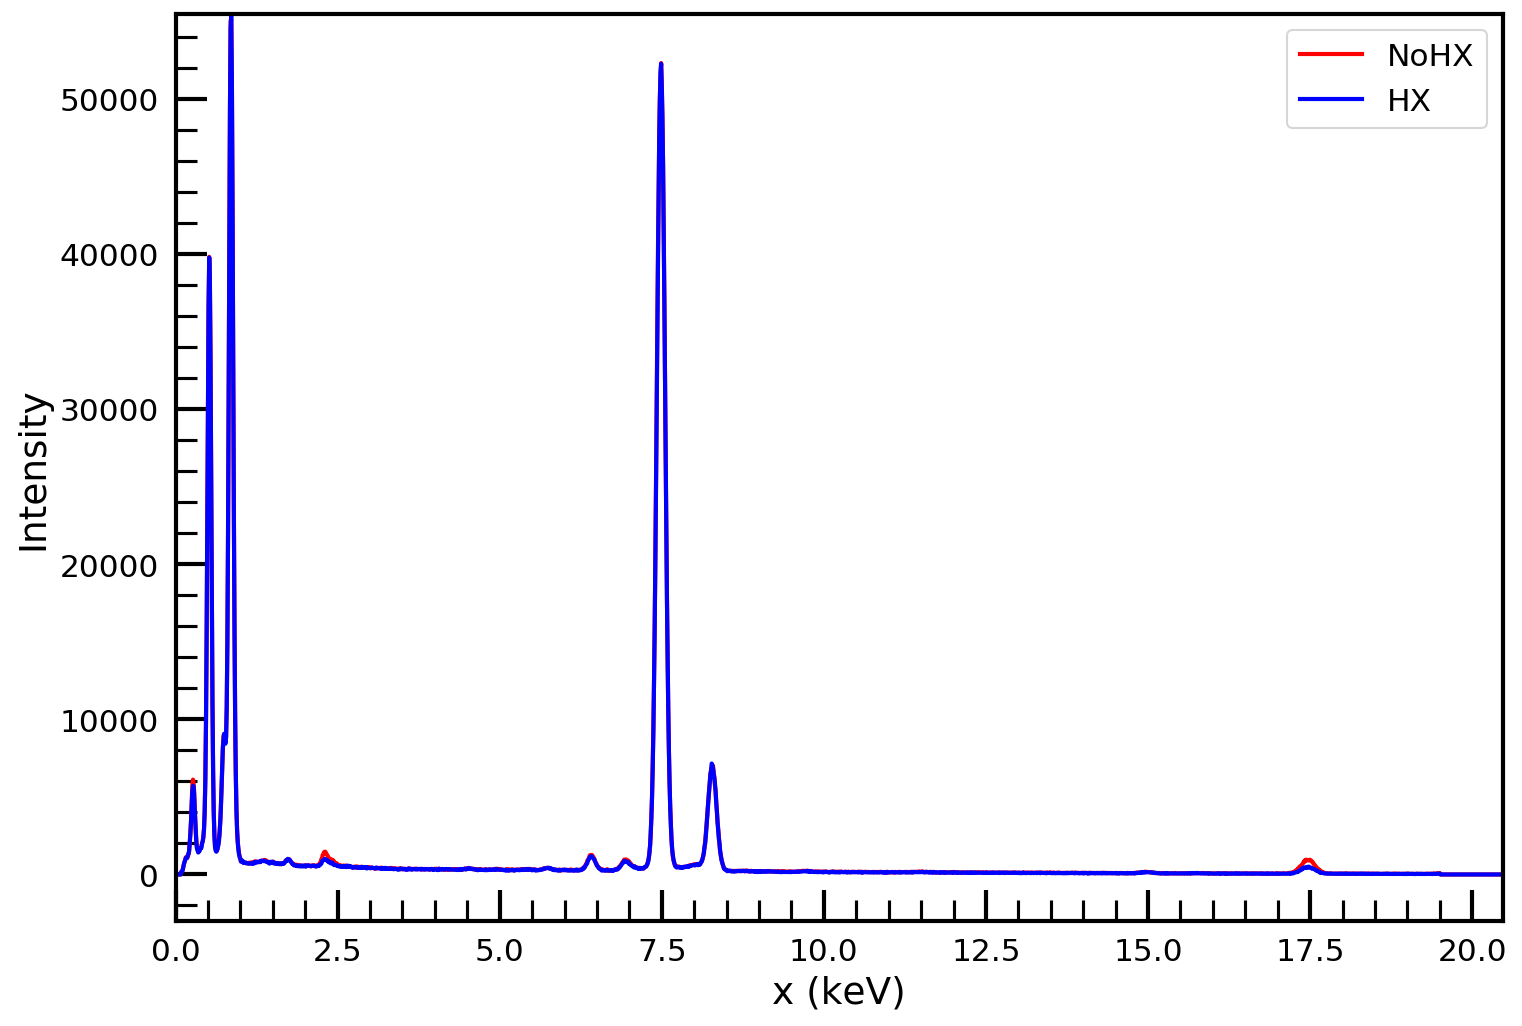

In [115]:
# Plot a rough comparision by overlapping the spectra. 

## Declare parameters for plots
output_name = 'Images/Roughcomparision'
fileformat= 'pdf'           # Choose "png", "eps" or "pdf". Default is png. Supported formats: emf, eps,  pdf, png, ps, raw, rgba, svg, svgz.  
params = {'figure.figsize'       : [10,7],
          #'figure.subplot.left'  : 0.15,
          #'figure.subplot.right' : 0.88,
          #'figure.subplot.bottom': 0.14,  
          #'figure.subplot.top'   : 0.89  
          'figure.dpi'           : 150,
          'axes.labelsize'       : 18,
          'axes.titlesize'       : 26,
          'axes.linewidth'       : 2,
          'axes.prop_cycle'      : cycler('color',['r', 'b', 'g', 'y','c','violet','orange','m','brown','k']),# +
                                   #cycler('marker',['s','^','o','x','.','*','D','p','8','h']),
          
          'xtick.labelsize'      : 15,
          'xtick.major.pad'      : 8,
          'xtick.major.size'     : 15,
          'xtick.minor.size'     : 10,
          'xtick.major.width'    : 2,   
          'xtick.minor.width'    : 1.5,

          'ytick.labelsize'      : 15,
          'ytick.major.pad'      : 8,
          'ytick.major.size'     : 15,
          'ytick.minor.size'     : 10, 
          'ytick.major.width'    : 2,   
          'ytick.minor.width'    : 1.5, 

          'legend.loc'           : 'upper right',
          'legend.frameon'       : True,
          'legend.numpoints'     : 1,
          'legend.fontsize'      : 15,

          'lines.markersize'     : 3,
          'lines.markeredgewidth': 1.0,
          'lines.linewidth'      : 2,                            

          'font.family'          : 'sans-serif',
          'font.serif'           : 'Arial'
          }

##  Reading the parameters declared above   
plt.rcParams.update(params)


## Set up figure (single, subplot etc)
ax1 = hs.plot.plot_spectra(spectra,legend=['NoHX','HX'])
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',direction='in',which='both')
ax1.set_ybound(lower=-3000)
plt.tight_layout(pad=.1)
#plt.savefig(output_name+'.'+fileformat)




There is not so much observable difference between the spectra, except for the Mo Lines: 
- Ka_1=17.47934,  Ka_2=17.3743   Kb=19.6083   La_1=2.29316   La_2=2.28985

In [9]:
elements = ['Ni','O','Fe','Mo','Si','Co','C','Cu']
for i in range(len(spectra)):
    spectra[i].add_elements(elements)

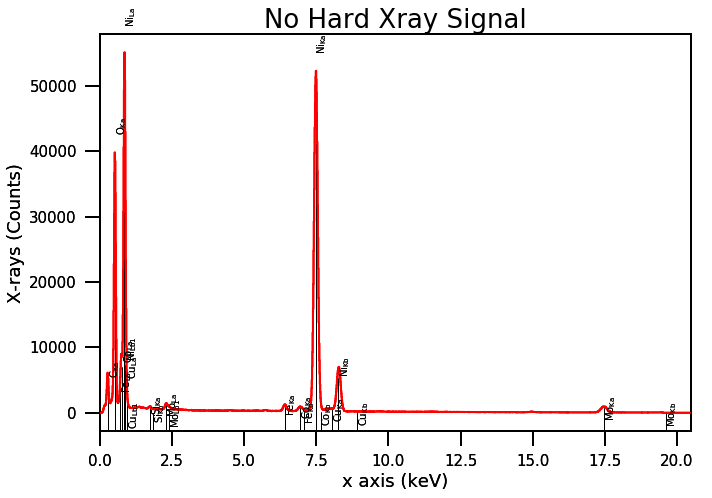

In [10]:
spectra[0].plot(True)

THe above spectra is just the raw spectra with the x-ray lines added as markers.

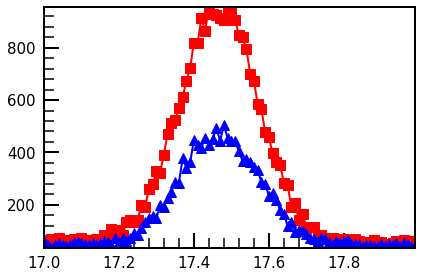

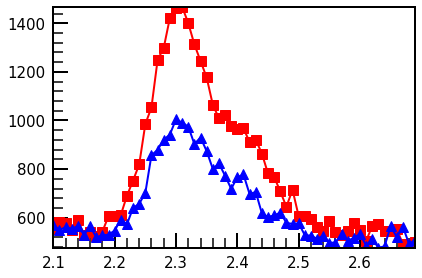

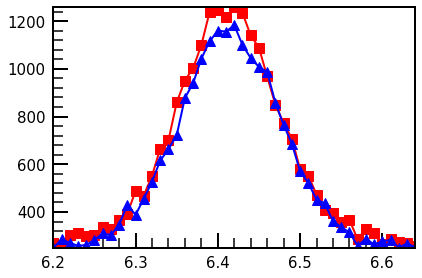

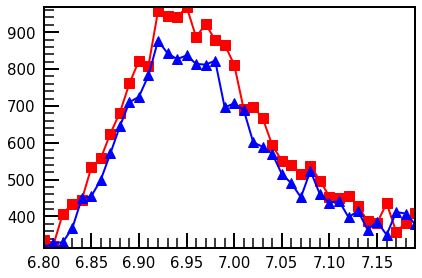

In [13]:
# Plots the individual peaks as .pdf.
%matplotlib inline
Mo_Ka = []
Mo_La = []
Fe_Ka = []
Co_Ka = []

for i in range (len(spectra)):
    Mo_K = spectra[i].isig[1700:1800]
    Mo_L = spectra[i].isig[210:270]
    Fe = spectra[i].isig[620:665]
    Co = spectra[i].isig[680:720]
    Mo_Ka.append(Mo_K)
    Mo_La.append(Mo_L)
    Fe_Ka.append(Fe)
    Co_Ka.append(Co)
    
peaks_list = [Mo_Ka,Mo_La,Fe_Ka,Co_Ka]  

## Plotting
params = {
          'lines.markersize'     : 10,
          'lines.markeredgewidth': 1.0,
          'lines.linewidth'      : 2,                            
          'axes.prop_cycle'      : cycler('color',['r', 'b', 'g', 'y','c','violet','orange','m','brown','k'])+
                                   cycler('marker',['s','^','o','x','.','*','D','p','8','h']),
          }

##  Reading the parameters declared above   
plt.rcParams.update(params)

## 
Output_file = ['Mo_Ka','Mo_La','Fe_Ka','Co_Ka']
for i in range(len(Output_file)):
    ax1 = hs.plot.plot_spectra(peaks_list[i])
    ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.tick_params(axis='both',direction='in',which='both')
    plt.tight_layout(pad=.1)
    ax1.xaxis.label.set_visible(False)
    ax1.yaxis.label.set_visible(False)
    #plt.savefig('Images/%s' %Output_file[i] +'.'+'pdf') 
    plt.show()

THe above plots are: Mo_Ka, Mo_La, Fe_Ka and Co_Ka, respectively. Red is without hard X-ray apperture.

# Comparing different order polynomials for the background fit.
 

In [15]:
# Create some number of new models of the same spectra. Each of them will append an unique background.

NoHX_models = []
HX_models = []

for i in range (15):
    NoHX_model_i = spectra[0].create_model(auto_background=False)
    NoHX_models.append(NoHX_model_i)

for i in range (15):
    HX_model_i = spectra[1].create_model(auto_background=False)
    HX_models.append(HX_model_i)

In [16]:
# Appending background to model, fit model and fit background. 
import time
a = np.arange(1,30)

NoHX_chisq = []
NoHX_fit_timer = []
for i in tqdm(range(len(NoHX_models))):
    start = time.time()
    NoHX_models[i].add_polynomial_background(order=a[i])
    NoHX_models[i].fit(bounded=True)
    NoHX_models[i].fit_background()
    NoHX_chisq.append(NoHX_models[i].red_chisq()[0])
    stop = time.time()
    timeduration = (stop-start)
    NoHX_fit_timer.append(timeduration)

HX_chisq = []
HX_fit_timer = []
for i in tqdm(range(len(HX_models))):
    start = time.time()
    HX_models[i].add_polynomial_background(order=a[i])
    HX_models[i].fit(bounded=True)
    HX_models[i].fit_background()
    HX_chisq.append(HX_models[i].red_chisq()[0])
    stop = time.time()
    timeduration = (stop-start)
    HX_fit_timer.append(timeduration)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.48s/it]


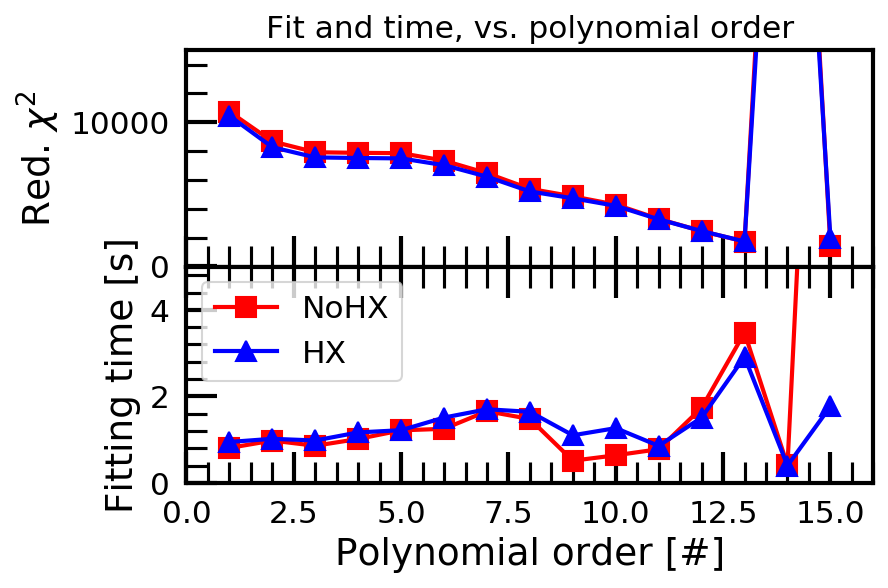

In [23]:
# Plot godness of fit, and time of fit versus polynomial order.

from matplotlib import gridspec
#### Data  ####
x = np.linspace(1,len(NoHX_chisq),len(NoHX_chisq))
y1 = NoHX_chisq
y2 = HX_chisq
y3 = NoHX_fit_timer
y4 = HX_fit_timer 


fig = plt.figure(dpi=150)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) # Set height ratios for subplots.

# First subplot
ax0 = plt.subplot(gs[0])
NoHX_c_plot, = ax0.plot(x,y1)
HX_c_plot, = ax0.plot(x,y2)
plt.title("Fit and time, vs. polynomial order", fontsize=15)
# Second subplot
ax1 = plt.subplot(gs[1], sharex = ax0)
NoHX_timer_plot, = ax1.plot(x, y3)
HX_timer_plot, = ax1.plot(x, y4)

### axis properties ###
ax1.set_xlabel('# degree polynomial')
ax0.set_ylabel('Red. $\chi^2$')
ax0.set_ylim([-10,15000])
ax1.set_xlim([0,16])
ax1.set_ylabel('Fitting time [s]')
ax1.set_ylim([0,5])
ax1.set_xlabel('Polynomial order [#]')
ax0.tick_params(axis='y',direction='in',which='both')
ax0.tick_params(axis='x',direction='in',which='both')
ax1.tick_params(axis='x',direction='in',which='both',bottom=True, top =True)
ax1.tick_params(axis='y',direction='in',which='both')
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

plt.setp(ax0.get_xticklabels(), visible=False)
# Remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

# put legned on first subplot
ax1.legend((NoHX_c_plot, HX_c_plot), ('NoHX', 'HX'), loc='upper left')


# remove vertical gap between subplots

plt.tight_layout(pad=1.)
plt.subplots_adjust(hspace=.0)
#plt.savefig('Images/rchi2andtimevspolynomial'+'.'+'pdf')
plt.show()


- The Red. $\chi ^2$ will not be correct since the variance speficied in the metadata is not correct. Nonetheless, the trend between the fits its perhaps sufficient for a qualitative comparision.
- The trend is: With increasing polynomial background order, the $\chi ^2$ value decreases, but the processeing time increases.

#  Get intensity under fitted Gaussian
These commands are equivalent:
- test = HX_model.get_lines_intensity()
- print (test[7].data[0])
- print(HX_model.components.Mo_Ka.parameters[0].value)

In [24]:
# Get intensity of the different polynomial fits.
Mo_Ka_A_NoHX = []
Mo_La_A_NoHX = []
Fe_Ka_A_NoHX = []
Co_Ka_A_NoHX = []
Cu_Ka_A_NoHX = []
Ni_Ka_A_NoHX = []
Ni_La_A_NoHX = []
background_NoHX = []
NoHX_modelvssignal_residual = []
for i in tqdm(range(len(NoHX_models))):
    Mo_Ka_A_NoHX.append(NoHX_models[i].components.Mo_Ka.parameters[0].value)
    Mo_La_A_NoHX.append(NoHX_models[i].components.Mo_La.parameters[0].value)
    Fe_Ka_A_NoHX.append(NoHX_models[i].components.Fe_Ka.parameters[0].value)
    Co_Ka_A_NoHX.append(NoHX_models[i].components.Co_Ka.parameters[0].value)
    Cu_Ka_A_NoHX.append(NoHX_models[i].components.Cu_Ka.parameters[0].value)
    Ni_Ka_A_NoHX.append(NoHX_models[i].components.Ni_Ka.parameters[0].value)
    Ni_La_A_NoHX.append(NoHX_models[i].components.Ni_La.parameters[0].value)
    background_NoHX.append(NoHX_models[i].as_signal([-1]).sum(0).data[0])
    NoHX_modelvssignal_residual.append((NoHX_models[i].as_signal([])-nohx).data.sum())


Mo_Ka_A_HX = []
Mo_La_A_HX = []
Fe_Ka_A_HX = []
Co_Ka_A_HX = []
Cu_Ka_A_HX = []
Ni_Ka_A_HX = []
Ni_La_A_HX = []
background_HX = []
HX_modelvssignal_residual = []
for i in tqdm(range(len(HX_models))):
    Mo_Ka_A_HX.append(HX_models[i].components.Mo_Ka.parameters[0].value)
    Mo_La_A_HX.append(HX_models[i].components.Mo_La.parameters[0].value)
    Fe_Ka_A_HX.append(HX_models[i].components.Fe_Ka.parameters[0].value)
    Co_Ka_A_HX.append(HX_models[i].components.Co_Ka.parameters[0].value)
    Cu_Ka_A_HX.append(HX_models[i].components.Cu_Ka.parameters[0].value)
    Ni_Ka_A_HX.append(HX_models[i].components.Ni_Ka.parameters[0].value)
    Ni_La_A_HX.append(HX_models[i].components.Ni_La.parameters[0].value)
    background_HX.append(HX_models[i].as_signal([-1]).sum(0).data[0])
    HX_modelvssignal_residual.append((HX_models[i].as_signal([])-hx).data.sum())
    
# Difference:
Mo_Ka_diff = np.array(Mo_Ka_A_NoHX)-np.array(Mo_Ka_A_HX)
Mo_La_diff = np.array(Mo_La_A_NoHX)-np.array(Mo_La_A_HX)
Fe_Ka_diff = np.array(Fe_Ka_A_NoHX)-np.array(Fe_Ka_A_HX)
Co_Ka_diff = np.array(Co_Ka_A_NoHX)-np.array(Co_Ka_A_HX)
Cu_Ka_diff = np.array(Cu_Ka_A_NoHX)-np.array(Cu_Ka_A_HX)
Ni_Ka_diff = np.array(Ni_Ka_A_NoHX)-np.array(Ni_Ka_A_HX)
Ni_La_diff = np.array(Ni_La_A_NoHX)-np.array(Ni_La_A_HX)
background_diff = np.array(background_NoHX)-np.array(background_HX)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 33.64it/s]


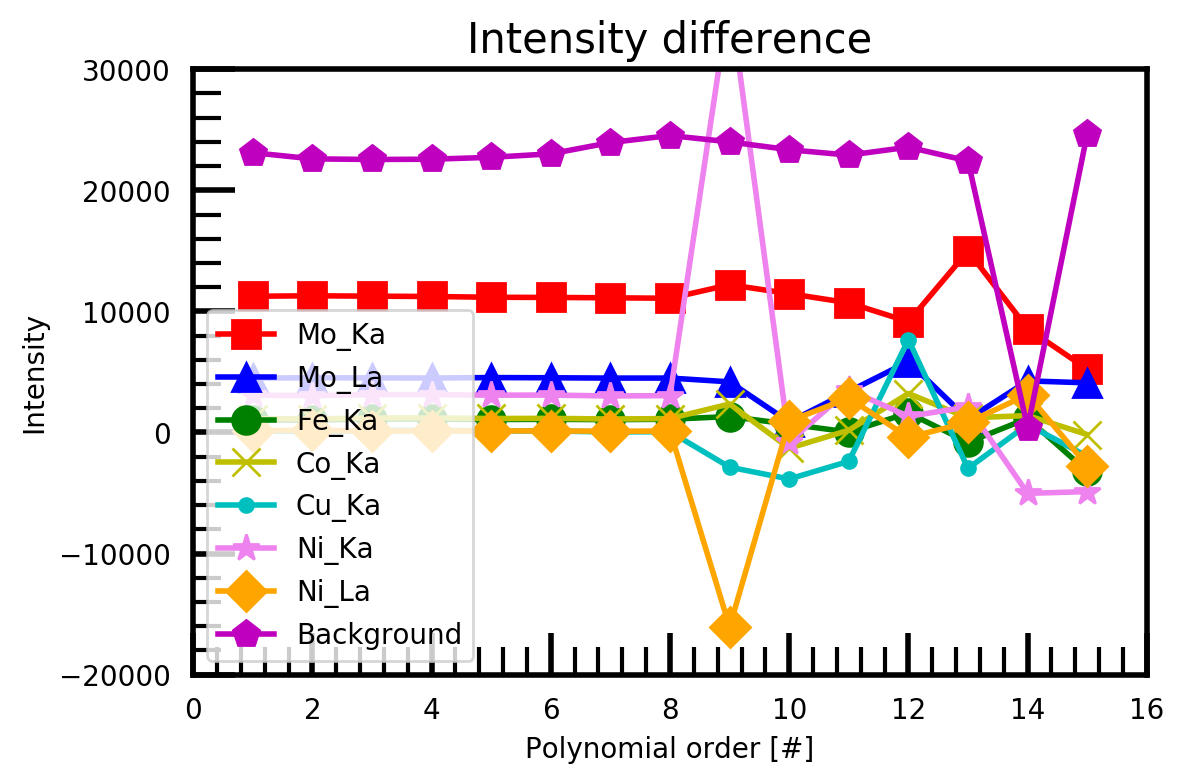

In [71]:
## Set up figure (single, subplot etc)
fig = plt.figure(1,dpi=200)
ax1=fig.add_subplot(111)

## Labels
ax1.set_xlabel('Polynomial order [#]',fontsize=10)
ax1.set_ylabel('Intensity',fontsize=10)
ax1.tick_params(labelsize=10)

ax1.set_ylim([-20000,30000])
ax1.set_xlim([0,16])
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

plt.title("Intensity difference",fontsize=15)

## Data
label_list = ['Mo_Ka','Mo_La','Fe_Ka', 'Co_Ka','Cu_Ka', 'Ni_Ka','Ni_La','Background']
y = [Mo_Ka_diff,Mo_La_diff,Fe_Ka_diff,Co_Ka_diff,Cu_Ka_diff, Ni_Ka_diff,Ni_La_diff,background_diff]
x = [np.linspace(1,len(NoHX_chisq),len(NoHX_chisq))]*(len(y))
## Plotting
plt.tick_params(axis='both',direction='in',which='both')

for i in range(len(label_list)):
    plt.plot(x[i],y[i],label=label_list[i])

ax1.legend(loc='lower left',fontsize=10)
plt.tight_layout(pad=1.)
#plt.savefig('Images/Diff_A-intensity'+'.'+'pdf')
plt.show()



The above figure is the difference in the Gaussian intensity for the specified peaks, between the two spectra. And the summed background.
- This is compared with different order of background polynomial used in the fit.
- The biggest differenec is in the background and Mo_Ka.

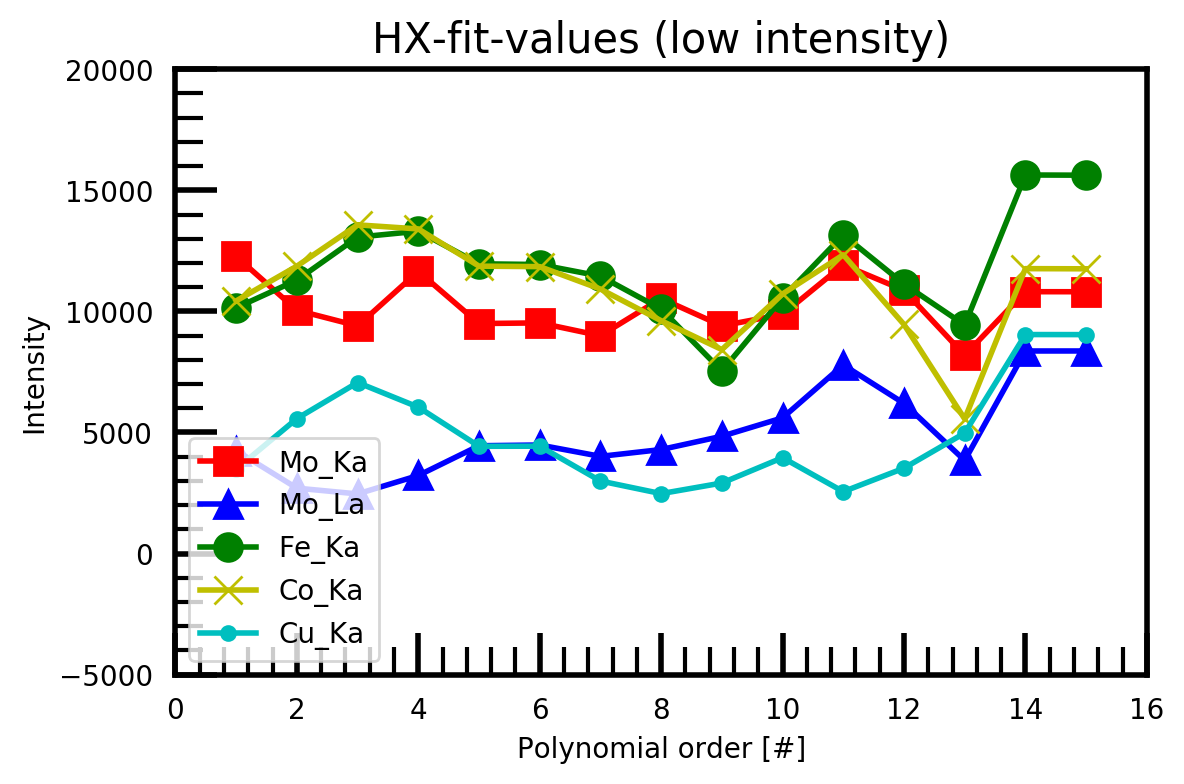

In [61]:
#### Low energy
fig = plt.figure(1,dpi=200)
ax1=fig.add_subplot(111)

## Labels
ax1.set_xlabel('Polynomial order [#]',fontsize=10)
ax1.set_ylabel('Intensity',fontsize=10)
ax1.tick_params(labelsize=10)

ax1.set_ylim([-5000,20000])
ax1.set_xlim([0,16])
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

plt.title("HX-fit-values (low intensity)",fontsize=15)

Mo_Ka_A_HX, Mo_La_A_HX, Fe_Ka_A_HX, Co_Ka_A_HX, Cu_Ka_A_HX, Ni_Ka_A_HX, Ni_La_A_HX,background_HX

## Data
label_list = ['Mo_Ka','Mo_La','Fe_Ka', 'Co_Ka','Cu_Ka', 'Ni_Ka','Ni_La','Background']
y = [Mo_Ka_A_HX, Mo_La_A_HX, Fe_Ka_A_HX, Co_Ka_A_HX, Cu_Ka_A_HX, Ni_Ka_A_HX, Ni_La_A_HX,background_HX]
x = [np.linspace(1,len(NoHX_chisq),len(NoHX_chisq))]*(len(y))
## Plotting
plt.tick_params(axis='both',direction='in',which='both')

for i in range(len(label_list)-3):
    plt.plot(x[i],y[i],label=label_list[i])

ax1.legend(loc='lower left',fontsize=10)
plt.tight_layout(pad=1.)
#plt.savefig('Images/Diff_A-intensity'+'.'+'pdf')
plt.show()


The intensity of the low intensity peaks varies slightly with varying polynomial. The same for the background and the high Ni_Ka. 

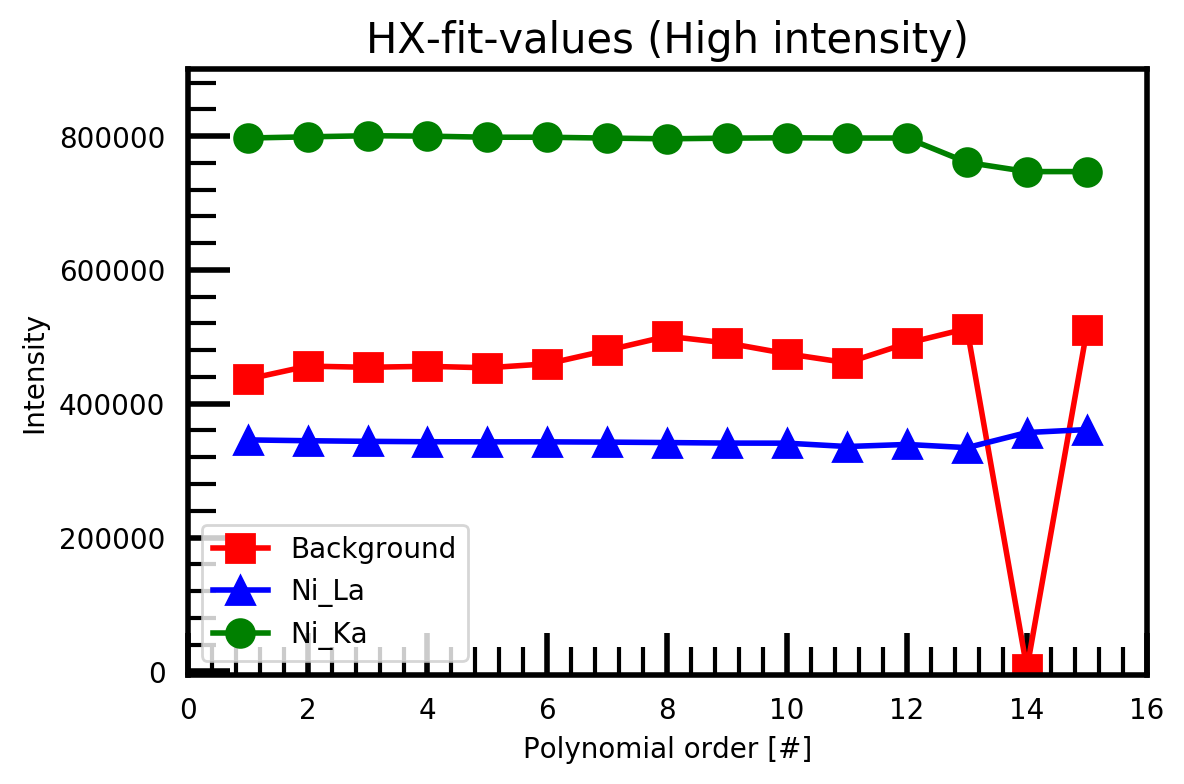

In [65]:
#### High intensity
fig = plt.figure(1,dpi=200)
ax1=fig.add_subplot(111)
ax1.set_xlabel('Polynomial order [#]',fontsize=10)
ax1.set_ylabel('Intensity',fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_ylim([-5000,900000])
ax1.set_xlim([0,16])
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(axis='both',direction='in',which='both')
plt.title("HX-fit-values (High intensity)",fontsize=15)
for i in range(3):
    plt.plot(x[-i-1],y[-i-1],label=label_list[-i-1])

ax1.legend(loc='lower left',fontsize=10)
plt.tight_layout(pad=1.)
#plt.savefig('Images/Diff_A-intensity'+'.'+'pdf')
plt.show()

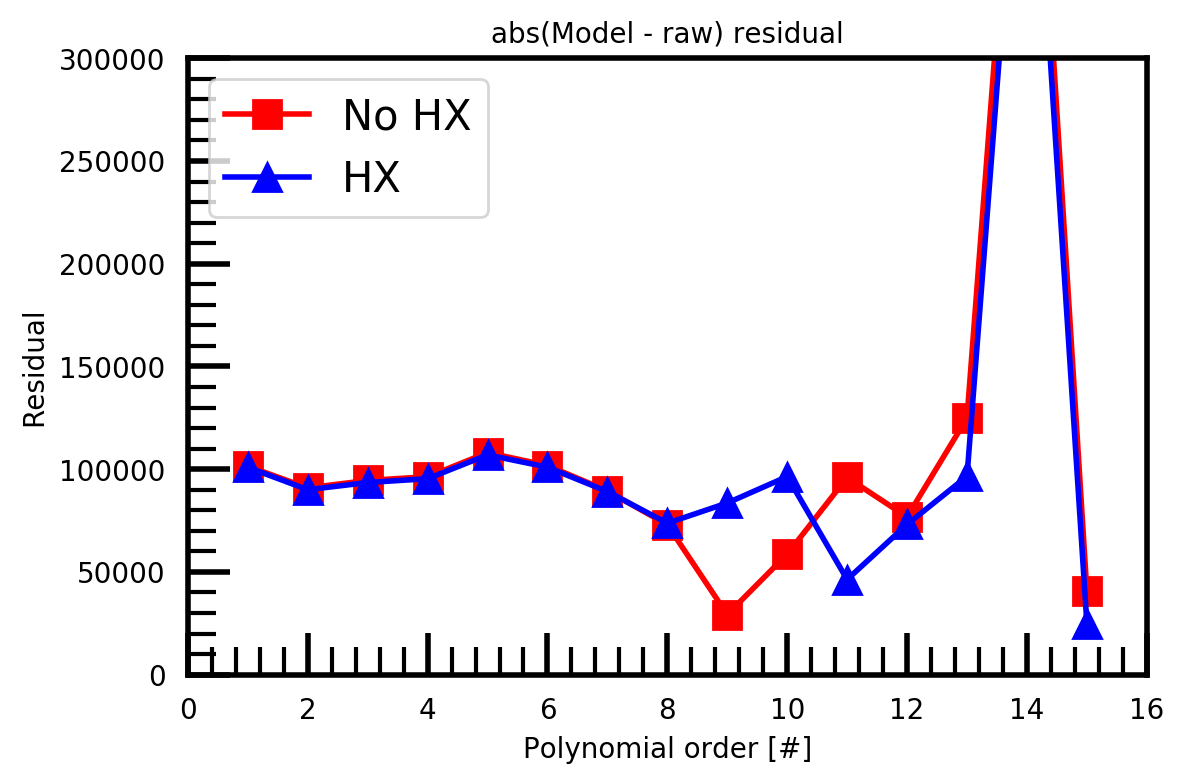

In [70]:
#### Comparision between raw data and model using residual ####

fig = plt.figure(1,dpi=200)
ax1=fig.add_subplot(111)
ax1.set_xlabel('Polynomial order [#]',fontsize=10)
ax1.set_ylabel('Residual',fontsize=10)
plt.title("abs(Model - raw) residual",fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_ylim([0,300000])
ax1.set_xlim([0,16])
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(axis='both',direction='in',which='both')

x = np.linspace(1,len(NoHX_chisq),len(NoHX_chisq))
y1 = np.array(np.abs(NoHX_modelvssignal_residual))
y2 = np.array(np.abs(HX_modelvssignal_residual))
plt.plot(x,y1,label='No HX')
plt.plot(x,y2,label='HX')
ax1.legend(loc='upper left')
plt.tight_layout(pad=1.)
#plt.savefig('Images/Modelvsraw-residual'+'.'+'pdf')



The absolute value of the residual of the fitted model minus the raw spectra is quite good, and stable with varying background model.

# Evaluation using background order 8
- The 8 order background seem to be the most stable one. Higher order seems to do more strange stuff. I Therefore choose the model with this background to evaluate the data further.

In [72]:
# Create models
NoHX_model = NoHX_models[7]
HX_model = HX_models[7]

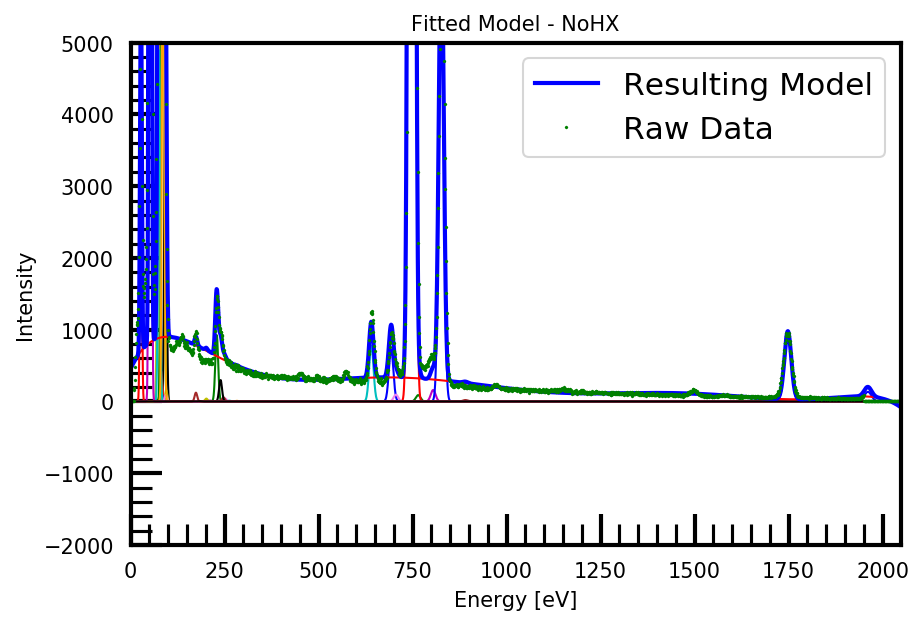

In [97]:
# Make a nice plot of the two models with all componenets and the full fit.
NoHX_model_individual_assignal = []
for i in range(len(NoHX_model)):
    NoHX_model_individual_assignal.append(NoHX_model.as_signal([i]))
NoHX_model_assignal = NoHX_model.as_signal()

## Plotting
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

# I want the lines of the componenets to be thinner than the full model.
params = {
          'lines.markersize'     : 10,
          'lines.markeredgewidth': 1.0,
          'lines.linewidth'      : 1,                            
          'axes.prop_cycle'      : cycler('color',['r', 'b', 'g', 'y','c','violet','orange','m','brown','k']),#+
                                   #cycler('marker',['s','^','o','x','.','*','D','p','8','h']),
          }

##  Reading the parameters declared above   
plt.rcParams.update(params)
## Plot
for i in range (len(NoHX_model_individual_assignal)):
    ax1.plot(NoHX_model_individual_assignal[i])

ax2.plot(NoHX_model_assignal.data,linewidth=2,label='Resulting Model')
ax3.plot(nohx,linewidth=0,marker='x',markersize=1,label='Raw Data') # Rawdata
## Axes properties
plt.title("Fitted Model - NoHX",fontsize=10)
ax2.set_ylim([-2000,5000])
ax3.set_xlim([0,(NoHX_model_assignal.data.size)])
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(axis='both',direction='in',which='both',labelsize=10)
ax2.set_xlabel('Energy [eV]',fontsize=10)
ax2.set_ylabel('Intensity',fontsize=10)

ax2.legend(loc='upper right')

plt.tight_layout(pad=.1)
plt.show()
#plt.savefig('Images/Model_NoHX'+'.'+'pdf')


$\textbf{The figure above showns all the gaussian of the components, the raw data and the resulting fitted model (thicker blue line).}$
- The fit seems quite good, but missed slightly in the low energy region.

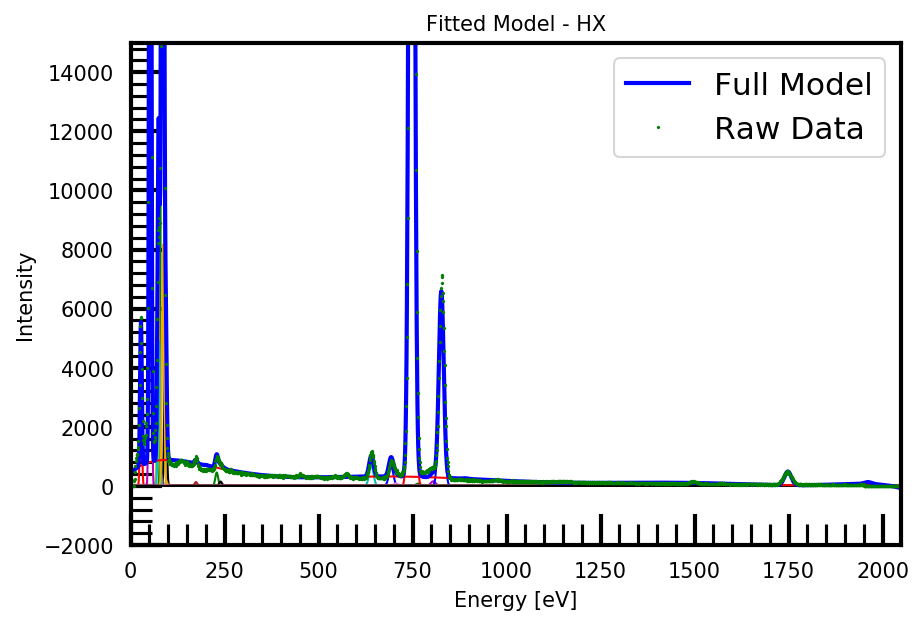

In [99]:
HX_model_individual_assignal = []
for i in range(len(HX_model)):
    HX_model_individual_assignal.append(HX_model.as_signal([i]))
HX_model_assignal = HX_model.as_signal()




## Plotting
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

params = {
          'lines.markersize'     : 10,
          'lines.markeredgewidth': 1.0,
          'lines.linewidth'      : 1,                            
          'axes.prop_cycle'      : cycler('color',['r', 'b', 'g', 'y','c','violet','orange','m','brown','k']),#+
                                   #cycler('marker',['s','^','o','x','.','*','D','p','8','h']),
          }

##  Reading the parameters declared above   
plt.rcParams.update(params)

for i in range (len(HX_model_individual_assignal)):
    ax1.plot(HX_model_individual_assignal[i])


ax2.plot(HX_model_assignal.data,linewidth=2,label='Full Model')
ax3.plot(hx,linewidth=0,marker='x',markersize=1,label='Raw Data')
plt.title("Fitted Model - HX",fontsize=10)
## Axes
#ax1.set_ylim([-20,15000])
#ax1.set_xlim([-100,len(HX_model_assignal.data/100)])
ax2.set_ylim([-2000,15000])
ax2.set_xlim([0,(NoHX_model_assignal.data.size)])
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(axis='both',direction='in',which='both',labelsize=10)
ax2.set_xlabel('Energy [eV]',fontsize=10)
ax2.set_ylabel('Intensity',fontsize=10)
ax2.legend(loc='upper right')

plt.tight_layout(pad=.1)
plt.show()
#plt.savefig('Images/Model_HX'+'.'+'pdf')




In [113]:
from prettytable import PrettyTable
t = PrettyTable(['Peak', 'NoHX','HX','Difference in counts','Relative Difference [%]'])
for i in range(len(NoHX_model)-1):
    t.add_row([NoHX_model[i].name, np.around(NoHX_model[i].A.value,2), np.around(HX_model[i].A.value,2),np.around((NoHX_model[i].A.value-HX_model[i].A.value),2),np.around((1-HX_model[i].A.value/NoHX_model[i].A.value)*100,2)])

t.add_row([NoHX_model[-1].name,np.around(NoHX_model.as_signal([-1]).sum(0).data[0],2),np.around(HX_model.as_signal([-1]).sum(0).data[0],2),np.around((NoHX_model.as_signal([-1]).sum(0).data[0]-HX_model.as_signal([-1]).sum(0).data[0]),2)
          ,np.around((1-HX_model.as_signal([-1]).sum(0).data[0]/NoHX_model.as_signal([-1]).sum(0).data[0])*100,2)])
print (t)



+--------------------+-----------+-----------+----------------------+-------------------------+
|        Peak        |    NoHX   |     HX    | Difference in counts | Relative Difference [%] |
+--------------------+-----------+-----------+----------------------+-------------------------+
|        C_Ka        |  29372.86 |  27762.82 |       1610.04        |           5.48          |
|       Co_Ka        |  10764.78 |  9615.58  |        1149.2        |          10.68          |
|       Co_Kb        |  1374.66  |  1227.91  |        146.75        |          10.68          |
|       Co_La        |    0.0    |    0.0    |         0.0          |          98.73          |
|       Co_Ll        |    0.0    |    0.0    |         0.0          |          98.73          |
|       Co_Ln        |    0.0    |    0.0    |         0.0          |          98.73          |
|       Co_Lb3       |    0.0    |    0.0    |         0.0          |          98.73          |
|       Cu_Ka        |  2537.94  |  2475

$\textbf{In summary}:$
- The intensity removed using the HX aperture is primarly due to:
    - Background signal
    - Mo: Is halved by 50% for every peak.
    

# Other testing stuff! Not relevant

# Comparing fitting order. 
- The correct and best order is: m.fit(bounded) and then m.fit_background()

In [277]:
# Create some number of new models of the same spectra. Each of them will append an unique background.

NoHX_models2 = []
HX_models2 = []

for i in range (10):
    NoHX_model_i = spectra[0].create_model(auto_background=False)
    NoHX_models2.append(NoHX_model_i)

for i in range (10):
    HX_model_i = spectra[1].create_model(auto_background=False)
    HX_models2.append(HX_model_i)


In [278]:
import time
a = np.arange(1,30)

NoHX_chisq2 = []
NoHX_fit_timer2 = []
for i in tqdm(range(len(NoHX_models2))):
    start = time.time()
    NoHX_models2[i].add_polynomial_background(order=a[i])
    
    NoHX_models2[i].fit(bounded=True)
    NoHX_models2[i].fit_background()
    NoHX_models2[i].fit(bounded=True)

    NoHX_chisq2.append(NoHX_models2[i].red_chisq()[0])
    stop = time.time()
    timeduration = (stop-start)
    NoHX_fit_timer2.append(timeduration)

HX_chisq2 = []
HX_fit_timer2 = []
for i in tqdm(range(len(HX_models2))):
    start = time.time()
    HX_models2[i].add_polynomial_background(order=a[i])
    
    HX_models2[i].fit(bounded=True)
    HX_models2[i].fit_background()
    HX_models2[i].fit(bounded=True)
    HX_chisq2.append(HX_models2[i].red_chisq()[0])
    stop = time.time()
    timeduration = (stop-start)
    HX_fit_timer2.append(timeduration)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.88s/it]


In [273]:
### Bacground after model ###
NoHX_chisq

[10734.243646659317,
 8671.269501419456,
 7921.2369609942471,
 7879.2886540698,
 7856.3378327891096,
 7338.6442139211931,
 6465.6685039595895,
 5383.7417995469559,
 4859.9561745686851,
 4289.8091621920166]

In [274]:
### Bacground first ###
NoHX_chisq2

[378269.87298423919,
 371355.73262320628,
 367472.86593481136,
 366583.79185833602,
 367291.14210742567,
 368199.73903803556,
 365088.66459830373,
 361904.19778341625,
 360488.13113970868,
 359365.30368408118]

In [276]:
### Bacground first, fit and background again ###
NoHX_chisq2

[10744.775056862445,
 8684.0010605303651,
 7936.7748857836741,
 7898.6084082727784,
 7879.4297118107543,
 7363.8357354387472,
 6491.1409546419745,
 5407.6429339833703,
 4883.8940103175582,
 4313.1379315161676]

In [280]:
# Fit, background, fit
NoHX_chisq2

[378270.72159147216,
 371356.16033666668,
 367472.70199303876,
 366584.26905091997,
 367292.96263010637,
 368201.79685361014,
 365090.95560918003,
 361906.18901301175,
 360490.2796458372,
 359368.73756853479]